# Machine Learning Portfolio 3

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|Mo Belaachir|
|Jayden Debi-Tewari|Jaydendt1|jaydendt123|
|Quincy Soerohardjo|quincysoerohardjo2002|Quincy Soerohardjo|
|Mattias Aareleid|mattyonaize|Mattias Aareleid|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Feature Engineering](#feature-engineering)
- [Modeling](#modeling)
    
- [Results](#results)
    - [Overview](#overview)
    - [Scores](#scores)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, NMF
from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

## Data Overview

In [17]:
labeled_path = r"labeled"
unlabeled_path = r"unlabeled"

labeled_files = [os.path.join(labeled_path, file) for file in os.listdir(labeled_path)]
unlabeled_files = [os.path.join(unlabeled_path, file) for file in os.listdir(unlabeled_path)]

In [26]:
labels_new = pd.read_csv("labels_new.csv")
display(labels_new)

,filename,genre
0,m00248.wav,metal
1,m00230.wav,country
2,m00637.wav,hiphop
3,m00627.wav,metal
4,m00138.wav,reggae
5,m00192.wav,classical
6,m00429.wav,hiphop
7,m00623.wav,reggae
8,m00002.wav,jazz
9,m00039.wav,reggae


In [24]:
# Merge the labeled_files with the labels_new
labeled_files = pd.DataFrame(labeled_files, columns=["file_path"])
labeled_files["filename"] = labeled_files["file_path"].apply(lambda x: os.path.basename(x))
labeled_files = labeled_files.merge(labels_new, on="filename", how="left")
labeled_files["label"] = labeled_files["genre"].fillna("unknown")
display(labeled_files)

,file_path,filename,genre,label
0,labeled\m00002.wav,m00002.wav,jazz,jazz
1,labeled\m00039.wav,m00039.wav,reggae,reggae
2,labeled\m00041.wav,m00041.wav,pop,pop
3,labeled\m00072.wav,m00072.wav,disco,disco
4,labeled\m00096.wav,m00096.wav,disco,disco
5,labeled\m00102.wav,m00102.wav,classical,classical
6,labeled\m00112.wav,m00112.wav,reggae,reggae
7,labeled\m00138.wav,m00138.wav,reggae,reggae
8,labeled\m00192.wav,m00192.wav,classical,classical
9,labeled\m00206.wav,m00206.wav,hiphop,hiphop


In [27]:
# Merge the unlabeled_files with the labels_new
unlabeled_files = pd.DataFrame(unlabeled_files, columns=["file_path"])
unlabeled_files["filename"] = unlabeled_files["file_path"].apply(lambda x: os.path.basename(x))
unlabeled_files = unlabeled_files.merge(labels_new, on="filename", how="left")
unlabeled_files["label"] = unlabeled_files["genre"].fillna("unknown")
display(unlabeled_files)

,file_path,filename,genre,label
0,unlabeled\m00003.wav,m00003.wav,NaN,unknown
1,unlabeled\m00012.wav,m00012.wav,NaN,unknown
2,unlabeled\m00013.wav,m00013.wav,NaN,unknown
3,unlabeled\m00043.wav,m00043.wav,NaN,unknown
4,unlabeled\m00044.wav,m00044.wav,NaN,unknown
...,...,...,...,...
100,unlabeled\m00971.wav,m00971.wav,NaN,unknown
101,unlabeled\m00973.wav,m00973.wav,NaN,unknown
102,unlabeled\m00988.wav,m00988.wav,NaN,unknown
103,unlabeled\m00991.wav,m00991.wav,NaN,unknown


## Feature Engineering

In [3]:
def audio_features(files):
    features_list = []

    for file in files:
        # Check if it's an audio file (you can expand the condition for specific extensions)
        if file.endswith(('.wav', '.mp3', '.flac')):
            try:
                # Load the audio file
                y, sr = librosa.load(file, sr=None)  # Use original sampling rate

                # Extract features
                mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # MFCCs
                chroma = librosa.feature.chroma_stft(y=y, sr=sr)  # Chroma features
                spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)  # Spectral contrast
                spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)  # Spectral Bandwidth
                spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)  # Spectral Centroid
                rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)  # Roll-Off Frequency (85%)

                # Aggregate features (mean and standard deviation)
                feature_vector = {
                    'file_name': os.path.basename(file),
                    'mfccs_mean': np.mean(mfccs, axis=1).tolist(),
                    'mfccs_std': np.std(mfccs, axis=1).tolist(),
                    'chroma_mean': np.mean(chroma, axis=1).tolist(),
                    'spectral_contrast_mean': np.mean(spectral_contrast, axis=1).tolist(),
                    'spectral_bandwidth_mean': np.mean(spectral_bandwidth).tolist(),
                    'spectral_bandwidth_std': np.std(spectral_bandwidth).tolist(),
                    'spectral_centroid_mean': np.mean(spectral_centroid).tolist(),
                    'spectral_centroid_std': np.std(spectral_centroid).tolist(),
                    'rolloff_mean': np.mean(rolloff).tolist(),
                    'rolloff_std': np.std(rolloff).tolist(),
                }

                features_list.append(feature_vector)

            except Exception as e:
                print(f"Error processing {file}: {e}")
    return features_list


## Features uitleg 

- **Mel-frequency cepstral coefficients**: MFCC’s, of Mel-frequency Cepstral Coefficients, zijn een manier om geluid, zoals spraak, te analyseren en te vereenvoudigen zodat computers het kunnen begrijpen. Ze halen de belangrijkste eigenschappen van een stem of geluidssignaal naar voren, vergelijkbaar met een unieke handtekening. Dit helpt computers om verschillende woorden en stemmen te onderscheiden, bijvoorbeeld bij het omzetten van gesproken taal naar tekst in spraakherkenningssystemen. Deze feature bestaat dus uit meerdere coefficienten. Coëfficiënten 1 t/m 12 bevatten informatie over de variatie in het spectrum, zoals de toon. Verder werd er 2 soorten MFCC's waardes opgesteld en dat zijn de gemiddelde en standaard deviatie van de coefficienten. 

    **Het proces voor het berekenen van MFCC's**:
    -   Pre-processing:
        Het audiosignaal wordt gesegmenteerd in korte overlappende frames, zodat het stationair is (meestal 20-40 ms lang). 

    -   Fourier-transformatie:
        Elk frame wordt omgezet naar het frequentiedomein om het frequentiespectrum te verkrijgen.  

    -   Mel-filterbank toepassen:
        Een reeks filters (op de Mel-schaal) wordt toegepast om het frequentiespectrum te comprimeren tot een kleiner aantal frequentiebanden die meer aansluiten bij menselijke perceptie.  

    -   Logaritmische schaal:
        Het resultaat van de filterbank wordt logaritmisch geschaald om de manier waarop het menselijke oor veranderingen in intensiteit waarneemt na te bootsen.  

    -   Discrete Cosine Transform (DCT):
        DCT wordt toegepast om de log-Mel-spectrogramwaarden te decorreleren en een compacte representatie te creëren. Dit resulteert in de uiteindelijke MFCC's.
    https://www.geeksforgeeks.org/mel-frequency-cepstral-coefficients-mfcc-for-speech-recognition/?ref=gcse_outind

- **Chroma**: Verwijst naar een representatie van muzikale toonhoogtes of notenharmonieën, onafhankelijk van de octaafhoogte. Het is een manier om de harmonische inhoud van een muziekstuk te analyseren en wordt vaak gebruikt in muziekanalysetoepassingen zoals genreclassificatie, melodieherkenning, en akkoordreconstructie. Chroma verdeelt de muzikale toonhoogtes in 12 klassen, overeenkomend met de 12 halve tonen in een octaaf (bijvoorbeeld C, C#, D, enzovoort).  

    Er zijn verschillende manieren om een geluidsopname om te zetten in een chromagram, een visuele weergave van de toonhoogteklassen in muziek. Dit kan bijvoorbeeld door frequenties om te zetten naar toonhoogtes met speciale wiskundige methoden, zoals de Fourier-transformatie, of door filtertechnieken te gebruiken.  
    Ook kun je de eigenschappen van een chromagram aanpassen door het geluid vóór of na de omzetting te bewerken. Hiermee kun je bijvoorbeeld de toon, timing of dynamiek veranderen. Hierdoor bestaan er veel soorten chromagrammen, die afhankelijk van het doel verschillend werken bij het analyseren van muziek. 
    https://en.wikipedia.org/wiki/Chroma_feature

    
- **Spectral contrast**: Is een techniek die wordt gebruikt om de verschillen in energie (amplitude) tussen verschillende frequentiebanden binnen een geluidssignaal te analyseren. Het geeft informatie over de structuur van een geluid, zoals de verhouding tussen hoge en lage tonen, en helpt bij het identificeren van klanken. Het frequentiespectrum van een signaal wordt opgedeeld in meerdere frequentiebanden (bijvoorbeeld lage, midden en hoge tonen). Voor elke band wordt het contrast berekend als het verschil tussen de pieken (zoals harmonischen of andere sterke frequenties) en de dalen (gebieden met weinig energie, zoals stiltes of zwakke frequenties).  

    **Stap 1**: Voorbewerking van het audiosignaal

    We beginnen met een audiosignaal $x[n]$, dat wordt opgedeeld in kleine overlappende segmenten met behulp van een vensterfunctie (bijvoorbeeld een Hamming-venster). Elk segment wordt vervolgens verwerkt met de Short-Time Fourier Transform (STFT) om het frequentiespectrum te verkrijgen:

    $$
    x_w[k] = x[k] \cdot w[k]
    $$

    $$
    X(f) = \sum_{n=0}^{N-1} x_w[n] \cdot e^{-j 2 \pi f n / N}
    $$

    Hierbij is:
    - $x[k]$: Het originele signaal.
    - $w[k]$: De vensterfunctie.
    - $N$: De lengte van elk segment.
    - $X(f)$: De Fourier-transformatie, die de spectrale amplitude geeft bij frequentie $f$.



    **Stap 2**: Opdelen van het spectrum in frequentiebanden

    Het spectrum wordt ingedeeld in $B$ frequentiebanden. Elke band $b$ beslaat een bereik van frequenties $[f_{\text{min}}, f_{\text{max}}]$.

    Afhankelijk van de toepassing kunnen de banden lineair of logaritmisch worden ingedeeld:
    - **Lineair:** Elke band heeft dezelfde breedte.
    - **Logaritmisch:** Banden worden breder bij hogere frequenties, vergelijkbaar met hoe mensen geluid waarnemen.



    **Stap 3**: Energie binnen een band berekenen

    De energie in een frequentieband $b$ wordt berekend door de amplitudes in de band samen te voegen:

    $$
    E_b = \sum_{f=f_{\text{min}}}^{f_{\text{max}}} |X(f)|^2
    $$

    Hierbij is $|X(f)|^2$ de magnitude van de spectrale energie bij frequentie $f$.



    **Stap 4**: Pieken en dalen bepalen

    Voor elke frequentieband $b$ berekenen we:
    - **Piekenergie $P_b$:** Het gemiddelde van de hoogste $p\%$ waarden in de band.

    $$
    P_b = \frac{1}{|F_p|} \sum_{f \in F_p} |X(f)|
    $$

    - **Dalenergie $V_b$:** Het gemiddelde van de laagste $v\%$ waarden in de band.

    $$
    V_b = \frac{1}{|F_v|} \sum_{f \in F_v} |X(f)|
    $$

    Hierbij zijn $F_p$ en $F_v$ respectievelijk de sets van frequenties met de hoogste $p\%$ en laagste $v\%$ energie.



    **Stap 5**: Contrast berekenen

    Het **spectrale contrast** wordt berekend als het logaritmische verschil tussen de piek- en dalenergie in een band:

    $$
    C_b = \log_{10} \left( \frac{P_b}{V_b} \right)
    $$



    **Stap 6**: Combineer de contrastwaarden

    De spectrale contrastwaarden voor alle banden $b = 1, 2, \ldots, B$ worden samengevoegd tot een vector:

    $$
    \mathbf{C} = [C_1, C_2, \ldots, C_B]
    $$



    **Optioneel**: Tijdsgemiddelde

    Als het signaal over meerdere tijdframes wordt geanalyseerd, kan een gemiddelde waarde over de tijd worden berekend:

    $$
    \bar{C}_b = \frac{1}{T} \sum_{t=1}^T C_b(t)
    $$

    Hierbij is $T$ het aantal tijdframes.
    https://zenn.dev/yuto_mo/articles/7413ca2ed4eb5f  



- **Spectral Bandwith**: De bandbreedte is het bereik tussen de hoogste en laagste frequenties van een signaal. Omdat signalen oscilleren rond een centraal punt (het zwaartepunt), kan de totale spreiding van het signaal aan beide zijden van dit punt worden gezien als de bandbreedte binnen een bepaald tijdsinterval.  

    **Spectrale Bandbreedte Berekenen**:

    - **1. Fouriertransformatie**  
    De eerste stap is om een signaal van het tijdsdomein naar het frequentiedomein om te zetten met een Fouriertransformatie. Hiermee verkrijgen we:
      - De frequenties $f_i$
      - De amplitudes (of energie) $A_i$

      De energie wordt meestal berekend als het kwadraat van de amplitude:
      $$
      E_i = |A_i|^2
      $$

    - **2. Het gemiddelde (mean)**  
    Het gemiddelde van de spectrale bandbreedte wordt berekend als een gewogen gemiddelde van de frequenties, waarbij de energie $E_i$ de gewichten bepaalt:

      $$
      f_{\text{gemiddeld}} = \frac{\sum_{i} f_i E_i}{\sum_{i} E_i}
      $$

    - **3. De standaarddeviatie (std)**  
    De standaarddeviatie van de frequenties geeft aan hoe breed het spectrum verspreid is rondom het gemiddelde. Dit wordt berekend met:

      $$
      \sigma = \sqrt{\frac{\sum_{i} E_i (f_i - f_{\text{gemiddeld}})^2}{\sum_{i} E_i}}
      $$

    - **4. Stappen in Python**  
        1. Bereken de Fouriertransformatie van het audiosignaal.
        2. Extracteer de frequenties $f_i$ en amplitudes $A_i$.
        3. Bereken de energie $E_i = |A_i|^2$.
        4. Gebruik de bovenstaande formules om $f_{\text{gemiddeld}}$ en $\sigma$ te berekenen.

    - **5. Interpretatie**  
      - **Gemiddelde ($f_{\text{gemiddeld}}$)**: De centrale frequentie van het signaal.
      - **Standaarddeviatie ($\sigma$)**: De breedte van het frequentiespectrum. Een kleine $\sigma$ duidt op een smal spectrum, terwijl een grote $\sigma$ wijst op een breed spectrum.





In [4]:
labeled_fl = audio_features(labeled_files)
unlabeled_fl = audio_features(unlabeled_files)

In [5]:
labeled_df = pd.DataFrame(labeled_fl).set_index('file_name')
unlabeled_df = pd.DataFrame(unlabeled_fl).set_index('file_name')

In [6]:
unlabeled_df

,mfccs_mean,mfccs_std,chroma_mean,spectral_contrast_mean,spectral_bandwidth_mean,spectral_bandwidth_std,spectral_centroid_mean,spectral_centroid_std,rolloff_mean,rolloff_std
file_name,,,,,,,,,,
m00003.wav,"[-82.51111602783203, 97.34172058105469, -34.36...","[38.669281005859375, 17.976158142089844, 17.42...","[0.47129690647125244, 0.40974727272987366, 0.4...","[18.42324910196291, 14.811131697206996, 17.832...",2071.028440,256.021413,2254.606986,426.010685,4381.532206,825.368300
m00012.wav,"[-1.9132977724075317, 72.6861572265625, -32.79...","[21.85912322998047, 17.475719451904297, 15.581...","[0.4568102955818176, 0.5573737025260925, 0.680...","[18.524160576331486, 13.818720668244472, 18.00...",2286.252592,246.334701,2908.300131,392.188778,5405.816551,789.476095
m00013.wav,"[-287.60369873046875, 101.75817108154297, -35....","[70.5913314819336, 17.471935272216797, 14.6056...","[0.3978669047355652, 0.1438601166009903, 0.112...","[15.679685056568916, 18.681855999598262, 21.48...",1865.996047,150.084577,1952.607933,407.590792,3779.909832,668.785351
m00043.wav,"[-120.14749145507812, 91.31721496582031, -38.8...","[44.28722381591797, 22.18126106262207, 23.4976...","[0.4205609858036041, 0.35271966457366943, 0.43...","[18.87152117386596, 14.35500698781533, 15.5682...",2072.759900,343.662917,2384.634958,517.703205,4584.132502,1070.291214
m00044.wav,"[-437.6044006347656, 170.93153381347656, 7.419...","[63.8968391418457, 28.720317840576172, 25.7035...","[0.12168776988983154, 0.10355798155069351, 0.3...","[14.75606253173177, 17.16370892840314, 22.3184...",900.409298,210.772748,790.507005,180.089642,1159.412273,377.772182
...,...,...,...,...,...,...,...,...,...,...
m00971.wav,"[-246.1586456298828, 149.4286651611328, -41.98...","[76.47077941894531, 38.449031829833984, 15.516...","[0.3375800549983978, 0.2272903174161911, 0.499...","[17.927492352142526, 14.882813158957992, 19.21...",1588.217850,446.341219,1525.791709,459.815904,2733.184659,982.391092
m00973.wav,"[-8.573004722595215, 54.2957878112793, 20.9641...","[55.02655792236328, 23.15241813659668, 20.5675...","[0.3442322313785553, 0.4773416519165039, 0.461...","[20.139989902635932, 15.154152301920007, 19.01...",3295.063699,333.732126,3669.810467,938.109519,7876.372739,1289.897788
m00988.wav,"[-56.15306091308594, 36.44850158691406, 11.979...","[70.65717315673828, 33.994869232177734, 25.310...","[0.45649614930152893, 0.41816866397857666, 0.3...","[20.4345690226062, 17.928656849275942, 18.5909...",3361.641125,313.312735,3941.417696,1162.771630,8260.423162,1196.440796


In [7]:
# Final labeled DataFrame
class AudioFeatureExpander:
    def __init__(self, labeled_df):
        self.labeled_df = labeled_df
    def expand_features(self):
        # Define the features to expand and their respective lengths
        features_to_expand = {
            'mfccs_mean': 13,
            'mfccs_std': 13,
            'chroma_mean': 12,
            'spectral_contrast_mean': 7
        }
        expanded_features_df = pd.DataFrame(index=self.labeled_df.index)
        # Expand each feature
        for feature, length in features_to_expand.items():
            expanded_df = pd.DataFrame(self.labeled_df[feature].tolist(), index=self.labeled_df.index,
                                       columns=[f'{feature}_{i}' for i in range(length)])
            expanded_features_df = pd.concat([expanded_features_df, expanded_df], axis=1)
        # # Add the remaining features
        remaining_features = ['spectral_bandwidth_mean', 'spectral_bandwidth_std',
                              'spectral_centroid_mean', 'spectral_centroid_std',
                              'rolloff_mean', 'rolloff_std']
        expanded_features_df = pd.concat([expanded_features_df, self.labeled_df[remaining_features]], axis=1)
        return expanded_features_df

In [8]:
# Usage
expander = AudioFeatureExpander(unlabeled_df)
final_unlabeled_df = expander.expand_features()
display(final_unlabeled_df)

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,mfccs_mean_10,mfccs_mean_11,mfccs_mean_12,mfccs_std_0,mfccs_std_1,mfccs_std_2,mfccs_std_3,mfccs_std_4,mfccs_std_5,mfccs_std_6,mfccs_std_7,mfccs_std_8,mfccs_std_9,mfccs_std_10,mfccs_std_11,mfccs_std_12,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,spectral_contrast_mean_0,spectral_contrast_mean_1,spectral_contrast_mean_2,spectral_contrast_mean_3,spectral_contrast_mean_4,spectral_contrast_mean_5,spectral_contrast_mean_6,spectral_bandwidth_mean,spectral_bandwidth_std,spectral_centroid_mean,spectral_centroid_std,rolloff_mean,rolloff_std
file_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
m00003.wav,-82.511116,97.341721,-34.367928,71.408501,-3.292029,17.375370,-9.026282,16.017792,-19.010939,12.084585,-9.567408,13.953283,-14.459843,38.669281,17.976158,17.420506,13.732415,9.274554,9.197666,9.216418,7.644602,7.794284,6.777957,7.380204,7.544622,7.064954,0.471297,0.409747,0.488771,0.442609,0.503924,0.427372,0.389844,0.410940,0.448522,0.488606,0.486308,0.662977,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065721,2071.028440,256.021413,2254.606986,426.010685,4381.532206,825.368300
m00012.wav,-1.913298,72.686157,-32.791992,63.605476,-18.556351,25.870161,-13.859100,18.078884,-11.946615,19.672184,-13.954248,18.755697,-11.187991,21.859123,17.475719,15.581608,10.556849,8.347109,8.000425,8.903178,7.457137,7.373907,6.871805,6.721302,7.231080,6.247564,0.456810,0.557374,0.680655,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,0.311572,0.326612,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887691,2286.252592,246.334701,2908.300131,392.188778,5405.816551,789.476095
m00013.wav,-287.603699,101.758171,-35.345406,41.280159,-12.727131,17.276148,-13.967989,16.304947,-5.592962,13.654110,-8.788416,-0.053095,-13.757536,70.591331,17.471935,14.605653,7.484632,11.334907,7.317162,10.026291,7.892459,8.673855,9.159690,12.261617,8.443221,11.332116,0.397867,0.143860,0.112334,0.102700,0.387866,0.583642,0.278688,0.283264,0.192714,0.517787,0.310177,0.168636,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825406,1865.996047,150.084577,1952.607933,407.590792,3779.909832,668.785351
m00043.wav,-120.147491,91.317215,-38.845890,75.008400,-3.813260,22.665588,-8.119440,23.654900,-14.630774,13.370975,-9.403305,13.706296,-9.315235,44.287224,22.181261,23.497639,14.564473,10.189630,10.347978,9.210694,8.198386,6.618116,8.076797,6.721008,5.650340,6.336876,0.420561,0.352720,0.438729,0.588503,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,0.425498,0.526869,18.871521,14.355007,15.568276,14.744588,16.072624,19.146556,39.286679,2072.759900,343.662917,2384.634958,517.703205,4584.132502,1070.291214
m00044.wav,-437.604401,170.931534,7.419581,-3.083473,0.789382,-11.128749,-12.522781,-6.907836,-5.858702,-8.461237,-8.481487,-8.339388,-7.378574,63.896839,28.720318,25.703560,11.270920,11.725129,11.461706,11.061062,10.545693,13.923300,11.246155,12.618073,14.727922,11.223578,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,0.408830,0.159130,14.756063,17.163709,22.318450,24.297561,24.119580,21.639522,17.475062,900.409298,210.772748,790.507005,180.089642,1159.412273,377.772182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m00971.wav,-246.158646,149.428665,-41.988865,11.606256,-10.289648,-4.019358,-7.136855,-10.135562,-9.420322,-7.171843,-3.158368,-5.640657,-2.586296,76.470779,38.449032,15.516282,9.866004,7.818055,7.556600,6.768150,8.246713,7.970280,7.855545,8.819655,7.837424,9.696887,0.337580,0.227290,0.499260,0.296814,0.362897,0.349061,0.208238,0.392273,0.218967,0.32106

In [9]:
numeric_features = final_unlabeled_df.select_dtypes(include=[np.number])


In [10]:
sns.set(style="darkgrid")

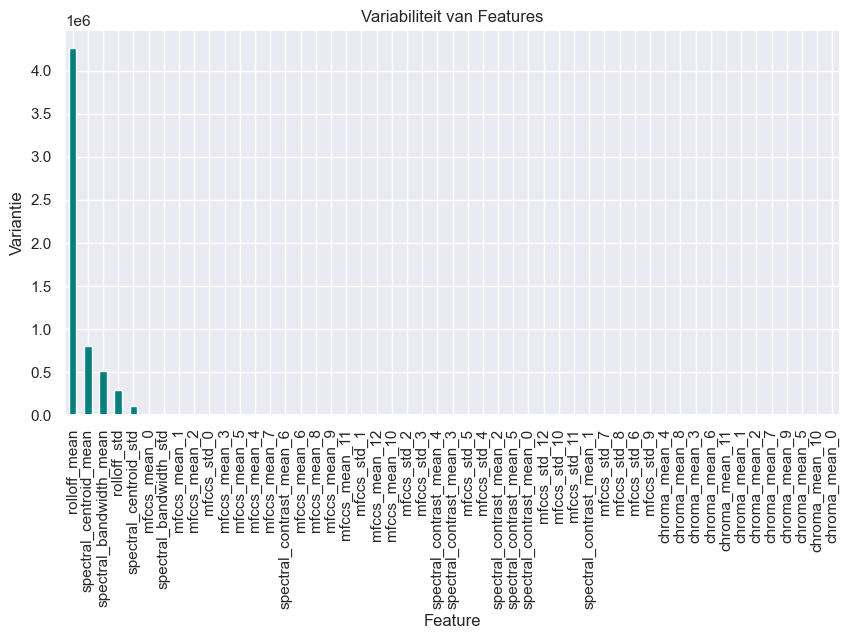

In [11]:
# Variabiliteit berekenen
feature_variability = numeric_features.var().sort_values(ascending=False)

# Plot de variabiliteit
plt.figure(figsize=(10, 5))
feature_variability.plot(kind='bar', color='teal')
plt.title('Variabiliteit van Features')
plt.ylabel('Variantie')
plt.xlabel('Feature')
plt.show()

## Modeling

## Results

## Conclusion & Advice

## Sources